<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import libraries**

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

In [ ]:
#Use to ConvLSTM2D
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt

### **Preprocessing**

In [ ]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
f = np.load('D:\9_Dive_into_code\LSTM\imdb.npz',allow_pickle=True)
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']
f.close()
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


### **Problem 1:** Implementation of various methods

- SimpleRNN
- CRANE
- LSTM
- ConvLSTM2D

In [ ]:
#LSTM

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 239s 302ms/step - loss: 0.4286 - accuracy: 0.8018 - val_loss: 0.3771 - val_accuracy: 0.8346
Epoch 2/15
782/782 [==============================] - 235s 300ms/step - loss: 0.2588 - accuracy: 0.8967 - val_loss: 0.3707 - val_accuracy: 0.8373
Epoch 3/15
782/782 [==============================] - 237s 303ms/step - loss: 0.1647 - accuracy: 0.9394 - val_loss: 0.4565 - val_accuracy: 0.8259
Epoch 4/15
782/782 [==============================] - 237s 303ms/step - loss: 0.1164 - accuracy: 0.9573 - val_loss: 0.5284 - val_accuracy: 0.8188
Epoch 5/15
782/782 [==============================] - 237s 303ms/step - loss: 0.0765 - accuracy: 0.9737 - val_loss: 0.6809 - val_accuracy: 0.8191
Epoch 6/15
782/782 [==============================] - 232s 297ms/step - loss: 0.0570 - accuracy: 0.9797 - val_loss: 0.7509 - val_accuracy: 0.8169
Epoch 7/15
782/782 [==============================] - 231s 296ms/step - loss: 0.0386 - accuracy: 0.9

In [ ]:
#SimpleRNN
from keras.layers import SimpleRNN

print('Build model Simple RNN')
simplernnmodel = Sequential()

simplernnmodel.add(Embedding(max_features, 128))
simplernnmodel.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
simplernnmodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
simplernnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
simplernnmodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = simplernnmodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Simple RNN Test score:', score)
print('Simpke RNN Test accuracy:', acc)

Build model Simple RNN
Train...
Epoch 1/15
782/782 [==============================] - 72s 90ms/step - loss: 0.6810 - accuracy: 0.5504 - val_loss: 0.6069 - val_accuracy: 0.6759
Epoch 2/15
782/782 [==============================] - 70s 90ms/step - loss: 0.5361 - accuracy: 0.7318 - val_loss: 0.4813 - val_accuracy: 0.7762
Epoch 3/15
782/782 [==============================] - 69s 89ms/step - loss: 0.4646 - accuracy: 0.7882 - val_loss: 0.5238 - val_accuracy: 0.7764
Epoch 4/15
782/782 [==============================] - 70s 89ms/step - loss: 0.4215 - accuracy: 0.8158 - val_loss: 0.4825 - val_accuracy: 0.7873
Epoch 5/15
782/782 [==============================] - 70s 89ms/step - loss: 0.3874 - accuracy: 0.8324 - val_loss: 0.4649 - val_accuracy: 0.7934
Epoch 6/15
782/782 [==============================] - 71s 90ms/step - loss: 0.3450 - accuracy: 0.8574 - val_loss: 0.5738 - val_accuracy: 0.7414
Epoch 7/15
782/782 [==============================] - 72s 93ms/step - loss: 0.3675 - accuracy: 0.8404 - 

In [ ]:
#CRANE
from keras.layers import GRU

print('Build model GRU')
grumodel = Sequential()

grumodel.add(Embedding(max_features, 128))
grumodel.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
grumodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
grumodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
grumodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = grumodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('GRU Test score:', score)
print('GRU Test accuracy:', acc)

Build model GRU
Train...
Epoch 1/15
782/782 [==============================] - 219s 276ms/step - loss: 0.4419 - accuracy: 0.7880 - val_loss: 0.3602 - val_accuracy: 0.8459
Epoch 2/15
782/782 [==============================] - 216s 276ms/step - loss: 0.2537 - accuracy: 0.9006 - val_loss: 0.3487 - val_accuracy: 0.8503
Epoch 3/15
782/782 [==============================] - 213s 272ms/step - loss: 0.1464 - accuracy: 0.9472 - val_loss: 0.4089 - val_accuracy: 0.8344
Epoch 4/15
782/782 [==============================] - 216s 277ms/step - loss: 0.0795 - accuracy: 0.9721 - val_loss: 0.5902 - val_accuracy: 0.8276
Epoch 5/15
782/782 [==============================] - 211s 270ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.6443 - val_accuracy: 0.8286
Epoch 6/15
782/782 [==============================] - 214s 274ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.7968 - val_accuracy: 0.8227
Epoch 7/15
782/782 [==============================] - 212s 272ms/step - loss: 0.0205 - accuracy: 0.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 95 samples, validate on 5 samples
Epoch 1/10
95/95 [==============================] - 255s - loss: 0.8575 - val_loss: 0.6737
Epoch 2/10
95/95 [==============================] - 259s - loss: 0.5093 - val_loss: 0.6569
Epoch 3/10
95/95 [==============================] - 236s - loss: 0.4002 - val_loss: 0.6487
Epoch 4/10
95/95 [==============================] - 216s - loss: 0.3105 - val_loss: 0.6324
Epoch 5/10
95/95 [==============================] - 198s - loss: 0.2590 - val_loss: 0.6192
Epoch 6/10
95/95 [==============================] - 197s - loss: 0.2074 - val_loss: 0.6127
Epoch 7/10
95/95 [==============================] - 223s - loss: 0.1621 - val_loss: 0.6017
Epoch 8/10
95/95 [==============================] - 201s - loss: 0.1368 - val_loss: 0.5805
Epoch 9/10
95/95 [==============================] - 198s - loss: 0.1091 - val_loss: 0.5628
Epoch 10/10
95/95 [========================

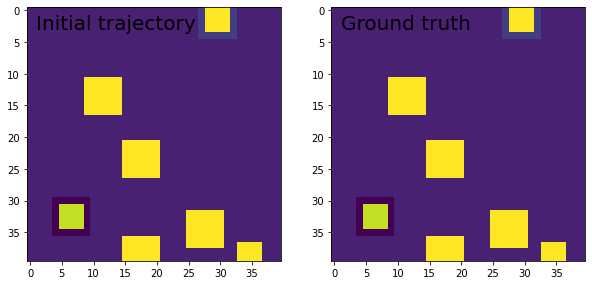

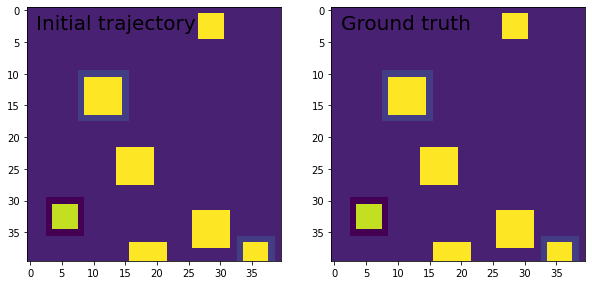

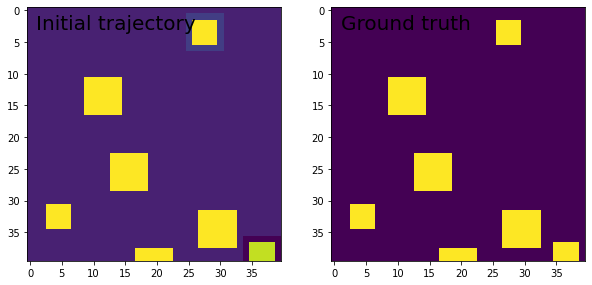

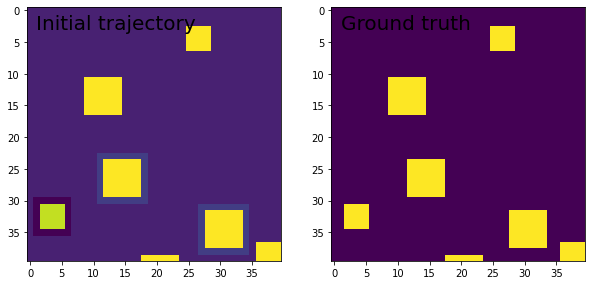

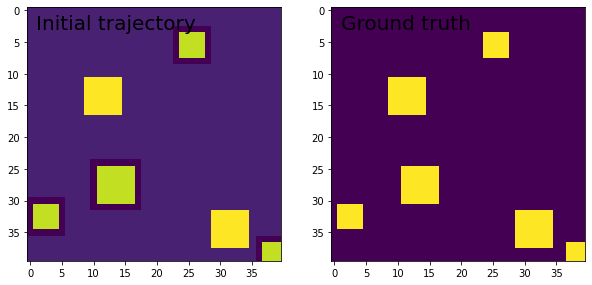

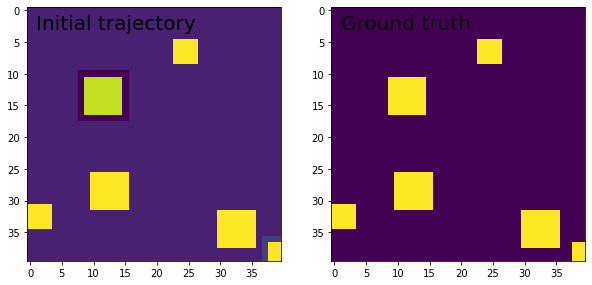

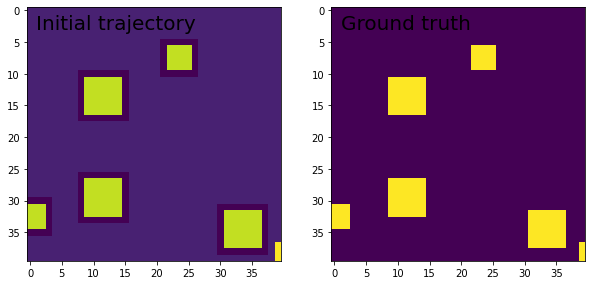

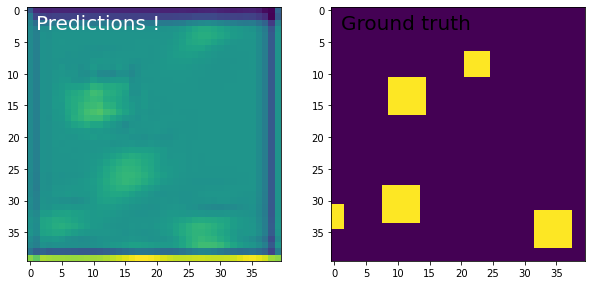

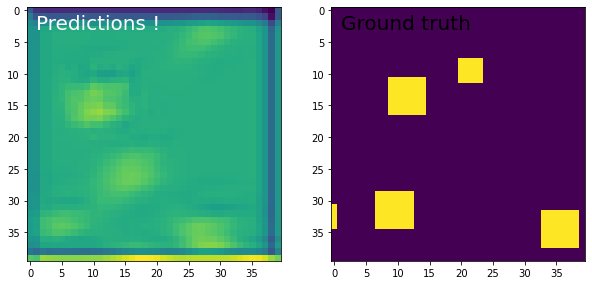

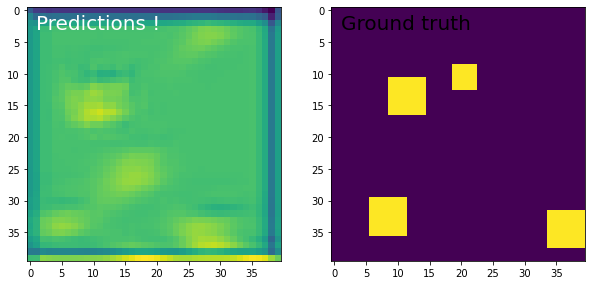

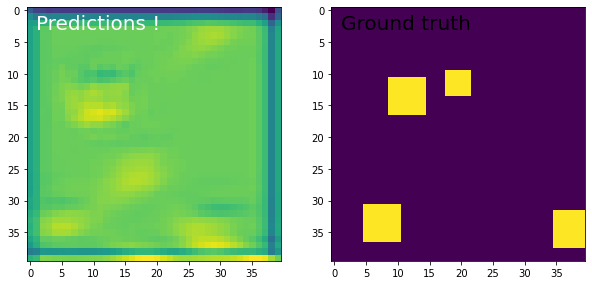

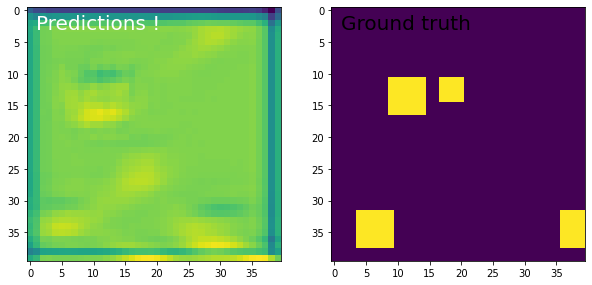

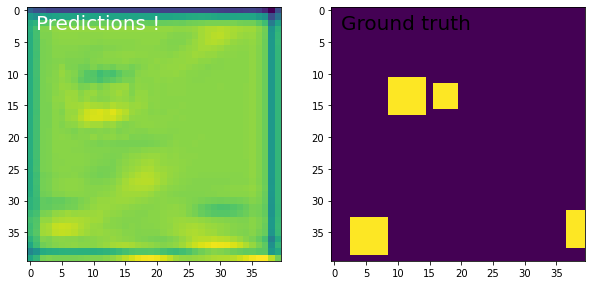

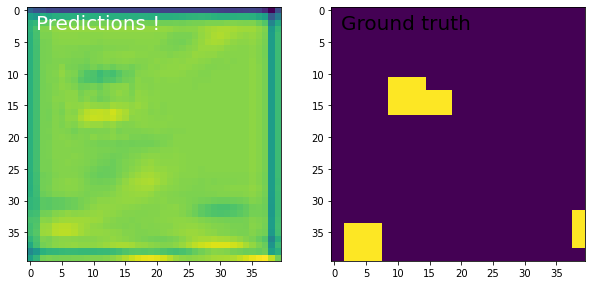

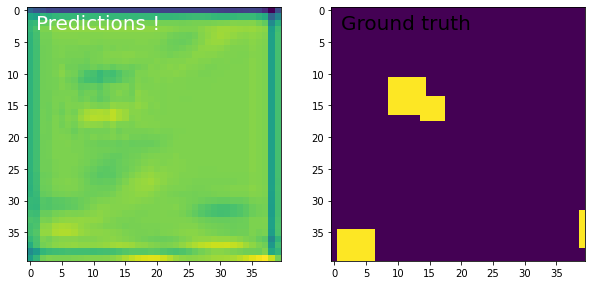

In [ ]:
# ConvLSTM2D

""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### **[Question 2]** (Advanced Task) Comparison between multiple datasets
Experiment with other datasets as well.

In [ ]:
from keras.datasets import boston_housing

max_features = 100
maxlen = 10
batch_size = 32
epochs = 5

(x_train_bh, y_train_bh), (x_test_bh, y_test_bh) = boston_housing.load_data()
x_train_bh = sequence.pad_sequences(x_train_bh, maxlen=maxlen)
x_test_bh = sequence.pad_sequences(x_test_bh, maxlen=maxlen)

print(len(x_train_bh), 'train sequences')
print(len(x_test_bh), 'test sequences')
print('Pad sequences (samples x time)')
x_train_bh = sequence.pad_sequences(x_train_bh, maxlen=maxlen)
x_test_bh = sequence.pad_sequences(x_test_bh, maxlen=maxlen)
print('x_train shape:', x_train_bh.shape)
print('x_test shape:', x_test_bh.shape)

404 train sequences
102 test sequences
Pad sequences (samples x time)
x_train shape: (404, 10)
x_test shape: (102, 10)


In [ ]:
#SimpleRNN
max_features = 100
model_SimpleRNN = Sequential()
model_SimpleRNN.add(Embedding(max_features, 128))
model_SimpleRNN.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model_SimpleRNN.add(Dense(1, activation='sigmoid'))
model_SimpleRNN.summary()

model_SimpleRNN.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_SimpleRNN.fit(x_train_bh,y_train_bh, batch_size=batch_size,epochs=epochs,validation_data=(x_test_bh, y_test_bh))
score_srnn, acc_srnn = model_SimpleRNN.evaluate(x_test_bh, y_test_bh,batch_size=batch_size)

#CRANE
model_CRANE = Sequential()
model_CRANE.add(Embedding(max_features, 128))
model_CRANE.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_CRANE.add(Dense(1, activation='sigmoid'))
model_CRANE.summary()

model_CRANE.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_CRANE.fit(x_train_bh,y_train_bh,batch_size=batch_size,epochs=epochs,validation_data=(x_test_bh, y_test_bh))
score_crane, acc_crane = model_CRANE.evaluate(x_test_bh, y_test_bh,batch_size=batch_size)

#LSTM
print('Build model...')
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 128))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.summary()

model_LSTM.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_LSTM.fit(x_train_bh, y_train_bh,batch_size=batch_size,epochs=epochs,validation_data=(x_test_bh, y_test_bh))
score_lstm, acc_lstm = model_LSTM.evaluate(x_test_bh, y_test_bh,batch_size=batch_size)

print("boston_housing dataset. \nSimpleRNN:")
print('Test score:', score_srnn)
print('Test accuracy:', acc_srnn)

print("CRANE:")
print('Test score:', score_crane)
print('Test accuracy:', acc_crane)

print("LSTM:")
print('Test score:', score_lstm)
print('Test accuracy:', acc_lstm)

### **Problem 3:** Explanation of other classes

Other related classes are listed in the documentation. Explain what they are. This includes classes that you don't actually deal with.

- RNN: A recurrent neural network (RNN) is a class of artificial neural networks in which the connections between nodes form a directed graph in temporal order.

- SimpleRNNCell: SimpleRNN's Cell class. A cell is the same network structure that appears recursively.

- GRUCell: A cell class in the gru layer, which is a recursive unit with a simplified gate of LSTM.

- LSTMCell: Basically a Cell class for the LSTM layer, containing the calculation logic for one step

- StackedRNNCells: A wrapper that makes the RNN cell stack look like a single cell. The word wrapper is used when you want to change the appearance of the same thing.

- CuDNNGRU: This is a high-speed GRU implementation using CuDNN.

- CuDNNLSTM: A high-speed LSTM implementation using CuDNN.